<a href="https://colab.research.google.com/github/surekavin/Linear-Regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment5


Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data,columns=["Chirps/Second","Ground Temperature"])
print(df)

    Chirps/Second  Ground Temperature
0            20.0                88.6
1            16.0                71.6
2            19.8                93.3
3            18.4                84.3
4            17.1                80.6
5            15.5                75.2
6            14.7                69.7
7            15.7                71.6
8            15.4                69.4
9            16.3                83.3
10           15.0                79.6
11           17.2                82.6
12           16.0                80.6
13           17.0                83.5
14           14.4                76.3


In [ ]:
df.rename(columns={"Chirps/Second":"Chirps_Second"},inplace=True)

In [ ]:
print(df.shape)

(15, 2)


In [ ]:
df.head()

,Chirps_Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.describe()

,Chirps_Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.Chirps_Second.quantile(0.75)

17.15

In [ ]:
iqr=df.Chirps_Second.quantile(0.75)-df.Chirps_Second.quantile(0.25)
upper_threshold=df.Chirps_Second.quantile(0.75)+(1.5*iqr)
lower_threshold=df.Chirps_Second.quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold

(19.699999999999996, 12.9)

In [ ]:
df.isnull().sum()

Chirps_Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df=df.drop_duplicates()
df.shape

(15, 2)

In [ ]:
df.dtypes

Chirps_Second         float64
Ground Temperature    float64
dtype: object

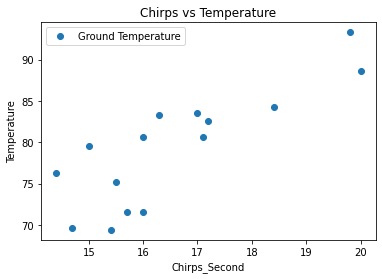

In [ ]:
df.plot(x='Chirps_Second',y='Ground Temperature',style='o')
plt.title('Chirps vs Temperature')
plt.xlabel('Chirps_Second')
plt.ylabel('Temperature')
plt.show()


In [ ]:
df.corr()

,Chirps_Second,Ground Temperature
Chirps_Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
df.rename(columns={"Ground Temperature":"Ground_Temperature"},inplace=True)

In [ ]:
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [ ]:
x=df.loc[:,['Chirps_Second']].values
y=df.loc[:,'Ground_Temperature'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
y_test

array([80.6, 88.6, 69.4, 83.5, 82.6])

In [ ]:
x_train.shape,x_test.shape

((10, 1), (5, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

22.145390514947536


In [ ]:
print(regressor.coef_)

[3.48606981]


In [ ]:
regressor.predict([[18.5]])

array([86.63768195])

In [ ]:
y_pred=regressor.predict(x_test)
y_pred

array([81.75718422, 91.86678666, 75.83086555, 81.40857724, 82.1057912 ])

In [ ]:
regressor.predict([[18]])

array([84.89464705])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,80.6,81.757184
1,88.6,91.866787
2,69.4,75.830866
3,83.5,81.408577
4,82.6,82.105791


In [ ]:
from sklearn import metrics
print('R2-SCORE:',metrics.r2_score(y_test,y_pred))
regressor.score(x_test,y_test)

R2-SCORE: 0.7119058108014018


0.7119058108014018

Assignment 6
Brain vs. Body Weight
In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks
1)Find the linear regression equation for this data for brain weight to body weight.
2)Chart the original data and the equation on the chart.
# 3)Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
[ ]


In [ ]:
dataset = pd.read_fwf("/content/brain_body.txt")


In [ ]:
print(dataset.shape)

(62, 2)


In [ ]:
dataset.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
dataset.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
dataset.Brain.quantile(0.75)

48.2025

In [ ]:
iqr=dataset.Brain.quantile(0.75)-dataset.Brain.quantile(0.25)
upper_threshold=dataset.Brain.quantile(0.75)+(1.5*iqr)
lower_threshold=dataset.Brain.quantile(0.25)-(1.5*iqr)
lower_threshold,upper_threshold

(-70.80375000000001, 119.60625)

In [ ]:
dataset.shape

(62, 2)

In [ ]:
dataset.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
dataset=dataset.drop_duplicates()
dataset.shape

(62, 2)

In [ ]:
dataset.dtypes

Brain    float64
Body     float64
dtype: object

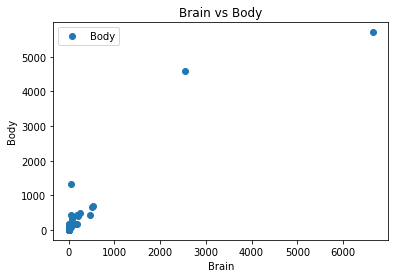

In [ ]:
dataset.plot(x='Brain',y='Body',style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [ ]:
dataset.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
dataset.Body.values

array([4.450e+01, 1.550e+01, 8.100e+00, 4.230e+02, 1.195e+02, 1.150e+02,
       9.820e+01, 5.500e+00, 5.800e+01, 6.400e+00, 4.000e+00, 5.700e+00,
       6.600e+00, 1.400e-01, 1.000e+00, 1.080e+01, 1.230e+01, 6.300e+00,
       4.603e+03, 3.000e-01, 4.190e+02, 6.550e+02, 3.500e+00, 1.150e+02,
       2.560e+01, 5.000e+00, 1.750e+01, 6.800e+02, 4.060e+02, 3.250e+02,
       1.230e+01, 1.320e+03, 5.712e+03, 3.900e+00, 1.790e+02, 5.600e+01,
       1.700e+01, 1.000e+00, 4.000e-01, 2.500e-01, 1.250e+01, 4.900e+02,
       1.210e+01, 1.750e+02, 1.570e+02, 4.400e+02, 1.795e+02, 2.400e+00,
       8.100e+01, 2.100e+01, 3.920e+01, 1.900e+00, 1.200e+00, 3.000e+00,
       3.300e-01, 1.800e+02, 2.500e+01, 1.690e+02, 2.600e+00, 1.140e+01,
       2.500e+00, 5.040e+01])

Preparing the data

In [ ]:
x=dataset.loc[:,['Brain']].values
y=dataset.loc[:,'Body'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
y_test

array([3.900e+00, 1.900e+00, 5.700e+00, 1.230e+01, 1.195e+02, 4.190e+02,
       6.300e+00, 1.750e+01, 2.560e+01, 1.230e+01, 1.150e+02, 4.000e+00,
       1.790e+02, 4.400e+02, 4.450e+01, 6.400e+00, 8.100e+01, 3.000e-01,
       1.800e+02])

In [ ]:
x_train.shape,x_test.shape

((43, 1), (19, 1))

Normlising/Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_test

array([[-0.25435855],
       [-0.25739141],
       [-0.2567886 ],
       [-0.25577137],
       [-0.22343654],
       [-0.08142892],
       [-0.25605393],
       [-0.25632708],
       [-0.25454692],
       [-0.25694872],
       [-0.24823631],
       [-0.25756   ],
       [-0.25125033],
       [-0.20852654],
       [-0.25446686],
       [-0.25725483],
       [-0.20114218],
       [-0.25763347],
       [-0.07681369]])

Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

369.3051162790698


In [ ]:
print(regressor.coef_)

[1022.11854146]


In [ ]:
regressor.predict([[53.65]])

array([55205.96486543])

In [ ]:
y_pred=regressor.predict(x_test)
y_pred

array([109.32052995, 106.22058581, 106.83672378, 107.87645659,
       140.92648215, 286.0751088 , 107.58764192, 107.30845441,
       109.12798684, 106.67306213, 115.57818116, 106.04825972,
       112.49749133, 156.16626964, 109.20981766, 106.36017957,
       163.71395971, 105.97316791, 290.79241509])

In [ ]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,3.9,109.320530
1,1.9,106.220586
2,5.7,106.836724
3,12.3,107.876457
4,119.5,140.926482
5,419.0,286.075109
6,6.3,107.587642
7,17.5,107.308454
8,25.6,109.127987
9,12.3,106.673062


Metrics

In [ ]:
from sklearn import metrics
print('R2-SCORE:',metrics.r2_score(y_test,y_pred))
regressor.score(x_test,y_test)

R2-SCORE: 0.2781142357780857


0.2781142357780857

Salary Discrimination
The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.
Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
Year. Number of years in current rank.
Degree. Highest degree. 1 for doctorate, 0 for master's.
YSdeg. Years since highest degree was earned.
Salary. Salary/year in dollars.
Tasks
Find the linear regression equation for this data using columns 1-5 to column 6.
Find the selection of columns with the best  R2  score.
Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
print(df)

    Sex  Rank  Year  Degree  YSdeg  Salary
0     0     3    25       1     35   36350
1     0     3    13       1     22   35350
2     0     3    10       1     23   28200
3     1     3     7       1     27   26775
4     0     3    19       0     30   33696
5     0     3    16       1     21   28516
6     1     3     0       0     32   24900
7     0     3    16       1     18   31909
8     0     3    13       0     30   31850
9     0     3    13       0     31   32850
10    0     3    12       1     22   27025
11    0     2    15       1     19   24750
12    0     3     9       1     17   28200
13    0     2     9       0     27   23712
14    0     3     9       1     24   25748
15    0     3     7       1     15   29342
16    0     3    13       1     20   31114
17    0     2    11       0     14   24742
18    0     2    10       0     15   22906
19    0     3     6       0     21   24450
20    0     1    16       0     23   19175
21    0     2     8       0     31   20525
22    0    

In [ ]:
print(df.shape)

(52, 6)


In [ ]:
dataset.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
iqr=df.Sex.quantile(0.75)-df.Sex.quantile(0.25)
upper_threshold=df.Sex.quantile(0.75)+(1.5*iqr)
lower_threshold=df.Sex.quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold


(2.5, -1.5)

In [ ]:
iqr=df.Rank.quantile(0.75)-df.Rank.quantile(0.25)
upper_threshold=df.Rank.quantile(0.75)+(1.5*iqr)
lower_threshold=df.Rank.quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold

(6.0, -2.0)

In [ ]:
iqr=df.Year.quantile(0.75)-df.Year.quantile(0.25)
upper_threshold=df.Year.quantile(0.75)+(1.5*iqr)
lower_threshold=df.Year.quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold

(23.0, -9.0)

In [ ]:
df.Year=df.Year.clip(-9,23)

In [ ]:
iqr=df.Degree.quantile(0.75)-df.Degree.quantile(0.25)
upper_threshold=df.Degree.quantile(0.75)+(1.5*iqr)
lower_threshold=df.Degree.quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold

(2.5, -1.5)

In [ ]:
iqr=df.YSdeg.quantile(0.75)-df.YSdeg.quantile(0.25)
upper_threshold=df.YSdeg.quantile(0.75)+(1.5*iqr)
lower_threshold=df.YSdeg.quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold

(48.0, -18.0)

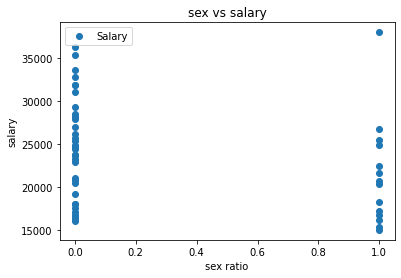

In [ ]:
df.plot(x='Sex',y='Salary',style='o')
plt.title('sex vs salary')
plt.xlabel('sex ratio')
plt.ylabel('salary')
plt.show()

In [ ]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


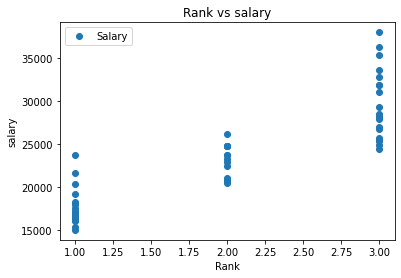

In [ ]:
df.plot(x='Rank',y='Salary',style='o')
plt.title('Rank vs salary')
plt.xlabel('Rank')
plt.ylabel('salary')
plt.show()

In [ ]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


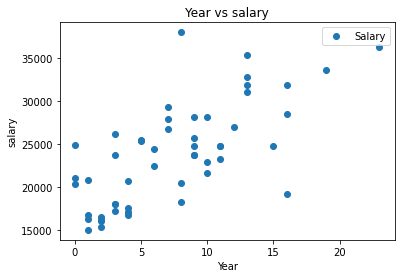

In [ ]:
df.plot(x='Year',y='Salary',style='o')
plt.title('Year vs salary')
plt.xlabel('Year')
plt.ylabel('salary')
plt.show()

In [ ]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


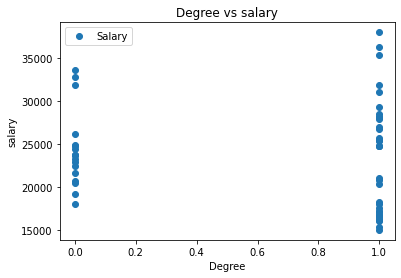

In [ ]:
df.plot(x='Degree',y='Salary',style='o')
plt.title('Degree vs salary')
plt.xlabel('Degree')
plt.ylabel('salary')
plt.show()

In [ ]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


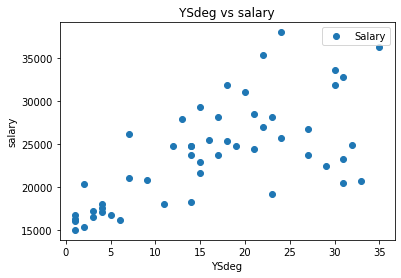

In [ ]:
df.plot(x='YSdeg',y='Salary',style='o')
plt.title('YSdeg vs salary')
plt.xlabel('YSdeg')
plt.ylabel('salary')
plt.show()

In [ ]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
x=df[["Sex", "Rank", "Year", "Degree", "YSdeg"]].values
y=df["Salary"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(x_train) 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Model training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(regressor.coef_,["Sex", "Rank", "Year", "Degree", "YSdeg"],columns=['coefficient'])
y_pred=regressor.predict(x_test_scaled)
coeff_df

,coefficient
Sex,697.132095
Rank,4792.612342
Year,2703.478856
Degree,-484.866809
YSdeg,-1225.178409


In [ ]:
regressor.predict(scaler.transform(np.array([[8,5000,0.6,1,2]])))

array([29371756.88256589])

In [ ]:
regressor.intercept_

23955.833333333332

In [ ]:
df=pd.DataFrame=({'Actual':y_test,'Predicted':y_pred})
df

{'Actual': array([28200, 18000, 33696, 16094, 31850, 19175, 15000, 20300, 25748,
        26775, 16150, 27959, 20690, 22906, 25500, 27025]),
 'Predicted': array([29748.08314648, 16720.80034726, 34269.46223514, 16409.64368408,
        31217.43273557, 21862.24363421, 17577.81960594, 16946.54074806,
        28889.83222414, 29181.51473888, 17473.45481611, 29221.16907844,
        22078.68678075, 25660.79971834, 29512.85159318, 30661.06152316])}

In [ ]:
from sklearn import metrics
print('R2-SCORE:',metrics.r2_score(y_test,y_pred))

R2-SCORE: 0.8230715132030104
